# Star Type Classification / NASA

NASA에서 수집한 별의 유형 분류 DataSet이다.

## Star Type Classification


For comparing all models of ML   
It can be used for prediction

Temperature -- K   
L -- L/Lo  
R -- R/Ro  
AM -- Mv  
Color -- General Color of Spectrum  
Spectral_Class -- O,B,A,F,G,K,M / SMASS - https://en.wikipedia.org/wiki/Asteroid_spectral_types  
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants  

TARGET:  
Type

from 0 to 5  

Red Dwarf - 0  
Brown Dwarf - 1  
White Dwarf - 2  
Main Sequence - 3  
Super Giants - 4  
Hyper Giants - 5

MATH:  

Lo = 3.828 x 10^26 Watts  
(Avg Luminosity of Sun)  
Ro = 6.9551 x 10^8 m  
(Avg Radius of Sun)  

## 요약
 요약
Calumns: 온도(K), 광도(L), 반지름(R), AM, 색상, 스펙트럼(Spectral Class), Type (분류)  

![Spectral_Class](https://scienceruls.weebly.com/uploads/5/1/7/4/51741831/846626525.GIF?448)

참고는 Kaggle에서   
https://www.kaggle.com/sohelranaccselab/star-type-classification-using-machine-learning  
https://www.kaggle.com/harshgupta57/star-type-eda-classifications

In [21]:
import pandas as pd
import numpy as np
import os

In [22]:
import matplotlib.pyplot as plt
DATA_PATH = os.path.join('data') # 데이터 저장 폴더

def load_star_data(): # wine data의 csv파일을 return하는 함수
    csv_path = os.path.join(DATA_PATH,'Stars.csv')
    return pd.read_csv(csv_path)

In [23]:
star = load_star_data()
star

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [24]:
#Star 데이터에서 Categorical 한 Data 들을 제거하여 분석
star = star.drop(['Color', 'Spectral_Class', 'Type'], axis=1)
star

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


In [25]:
#대표적인 Scaler에는 MinMaxScaler, MaxAbsScaler, StandardScaler, RobusScaler 4가지가 있다. + Normalizer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [27]:
MM = MinMaxScaler()
MA = MaxAbsScaler()
SS = StandardScaler()
RS = RobustScaler()
NO = Normalizer()

mm=pd.DataFrame(MM.fit_transform(star),columns=star.columns)
ma=pd.DataFrame(MA.fit_transform(star),columns=star.columns)
ss=pd.DataFrame(SS.fit_transform(star),columns=star.columns)
rs=pd.DataFrame(RS.fit_transform(star),columns=star.columns)
no=pd.DataFrame(NO.fit_transform(star),columns=star.columns)

<function matplotlib.pyplot.show(*args, **kw)>

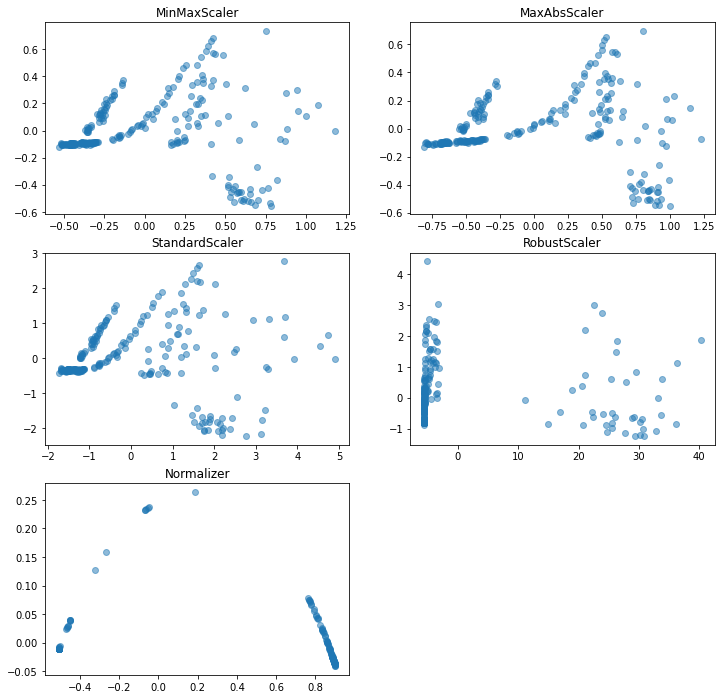

In [35]:
from sklearn.decomposition import PCA

#각 정규화 된 값들을 PCA로 차원축소 시키고 값이 어떻게 변화하는지 살펴본다.
pca = PCA(n_components=2)

mm_pca = pca.fit_transform(mm)
ma_pca = pca.fit_transform(ma)
ss_pca = pca.fit_transform(ss)
rs_pca = pca.fit_transform(rs)
no_pca = pca.fit_transform(no)

mm_pca = pd.DataFrame(mm_pca, columns=['x','y'])
ma_pca = pd.DataFrame(ma_pca, columns=['x','y'])
ss_pca = pd.DataFrame(ss_pca, columns=['x','y'])
rs_pca = pd.DataFrame(rs_pca, columns=['x','y'])
no_pca = pd.DataFrame(no_pca, columns=['x','y'])

plt.figure(figsize=(12, 12))

plt.subplot(321)
plt.scatter(mm_pca.x, mm_pca.y, alpha=0.5)
plt.title('MinMaxScaler')
plt.subplot(322)
plt.scatter(ma_pca.x, ma_pca.y, alpha=0.5)
plt.title('MaxAbsScaler')
plt.subplot(323)
plt.scatter(ss_pca.x, ss_pca.y, alpha=0.5)
plt.title('StandardScaler')
plt.subplot(324)
plt.scatter(rs_pca.x, rs_pca.y, alpha=0.5)
plt.title('RobustScaler')
plt.subplot(325)
plt.scatter(no_pca.x, no_pca.y, alpha=0.5)
plt.title('Normalizer')

plt.show